In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\juini\anaconda3\envs\py38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
symbols = ['EURUSD','GBPUSD','USDCHF','USDJPY','USDCAD']

timeframe = 'D1'

df = pd.read_csv("data/"+ symbols[0]+ timeframe+ ".csv")
df = df[['Date','Open','High','Low','Close']]
df['Date'] = pd.to_datetime(df['Date'])
df['Return'] = df['Close'].pct_change()*100
df['Returnshift'] = df['Return'].shift(-1)
df['alvo'] = np.select([df['Returnshift'] >= 0],[1], default = 0)

df['RatioMedia'] = df['Close'] / df['Close'].rolling(20).mean()


df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Return,Returnshift,alvo,RatioMedia
19,2013-01-28,1.34598,1.34765,1.34244,1.34447,-0.135186,0.312391,1,1.013714
20,2013-01-29,1.34446,1.34963,1.34140,1.34867,0.312391,0.600592,1,1.015803
21,2013-01-30,1.34866,1.35857,1.34816,1.35677,0.600592,0.141513,1,1.020447
22,2013-01-31,1.35676,1.35931,1.35409,1.35869,0.141513,0.384194,1,1.019781
23,2013-02-01,1.35864,1.37106,1.35828,1.36391,0.384194,-1.000799,0,1.021509
...,...,...,...,...,...,...,...,...,...
1809,2019-12-23,1.10767,1.10960,1.10700,1.10895,0.118269,-0.028856,0,1.000493
1810,2019-12-24,1.10887,1.10940,1.10692,1.10863,-0.028856,0.095614,1,0.999914
1811,2019-12-26,1.10875,1.11090,1.10824,1.10969,0.095614,0.715515,1,1.000428
1812,2019-12-27,1.10975,1.11884,1.10943,1.11763,0.715515,0.204003,1,1.006819


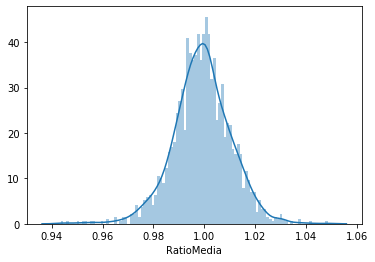

In [4]:
sns.distplot(df['RatioMedia'], bins = 100)
#plt.scatter(df['alvo'], df['RatioMedia'].shift(1))


In [5]:
variaveis = ['Return']
X = df[variaveis]
y = df['alvo']

In [7]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

modelo.fit(X, y)

p = modelo.predict(X)

np.mean(p==y)


0.5236768802228412

In [8]:
cond = [[(df['Returnshift'] < 0) & (df['High'] > df['Openshift'])], [(df['Returnshift'] >= 0) & (df['Low'] < df['Openshift'])]]

choice = [[df['Close'] - df['Openshift']], [df['Openshift'] - df['Close']]]

df['Bull'] = np.select(cond[1],choice[1], default=0)

df['Bear'] = np.select(cond[1],choice[1], default=0)

df['ResultCum'] = np.cumsum(df['Bull'] + df['Bear']) * 100000

df.dropna(inplace=True)

df.head()

KeyError: 'Openshift'

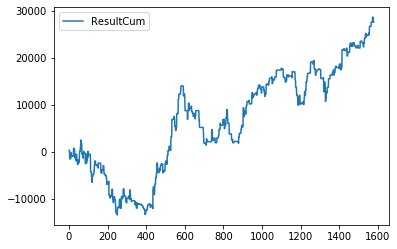

In [32]:
df.plot( y='ResultCum', kind = 'line')
plt.show()